This analysis is borrowed from Kevin Arvai https://realpython.com/k-means-clustering-python/

In [1]:
from kneed import KneeLocator

In [2]:
from sklearn.datasets import make_blobs

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.preprocessing import StandardScaler

In [55]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=1.5)

<AxesSubplot:>

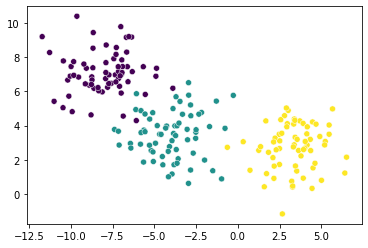

In [56]:
import seaborn as sns
sns.scatterplot(x=features[:,0], y=features[:,1], c=true_labels)

In [57]:
scaler = StandardScaler()

In [58]:
scaled_features = scaler.fit_transform(features)

<AxesSubplot:>

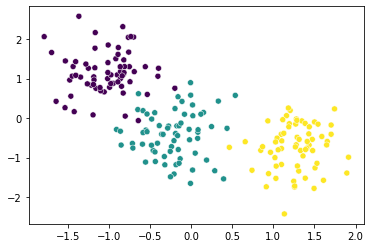

In [59]:
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

In [60]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300)

In [61]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [62]:
kmeans.cluster_centers_

array([[ 1.27051133, -0.74846796],
       [-1.01537726,  1.18720515],
       [-0.24763012, -0.42583315]])

In [63]:
kmeans.n_iter_

8

In [64]:
kmeans.labels_

array([0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2,
       0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0,
       1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2,
       1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1,
       0, 1], dtype=int32)

<AxesSubplot:title={'center':'k means labels'}>

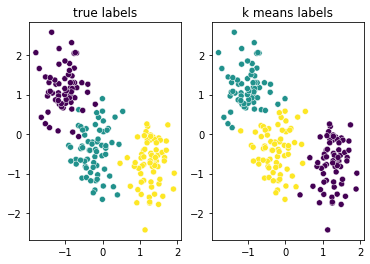

In [68]:
import pylab
pylab.subplot(1, 2, 1)
pylab.title("true labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

pylab.subplot(1, 2, 2)
pylab.title("k means labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=kmeans.labels_)

In [35]:
kmeans.inertia_

97.93200896519444

In [36]:
cluster_sizes = range(1, 11)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

<AxesSubplot:>

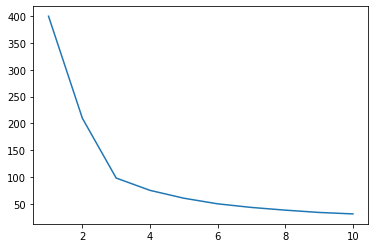

In [37]:
sns.lineplot(x=cluster_sizes, y=sse)

In [38]:
kl = KneeLocator(cluster_sizes, sse, curve="convex", direction="decreasing")

In [39]:
kl.elbow

3

In [40]:
silhouette_coefficients = []
cluster_sizes = range(2, 11)
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

<AxesSubplot:>

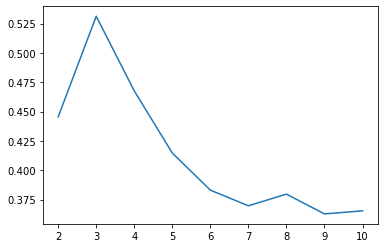

In [41]:
sns.lineplot(x=cluster_sizes, y=silhouette_coefficients)

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
from sklearn.datasets import make_moons

In [44]:
from sklearn.metrics import adjusted_rand_score

In [70]:
features, true_labels = make_moons(n_samples=250, noise=0.05)
scaled_features = scaler.fit_transform(features)

<AxesSubplot:>

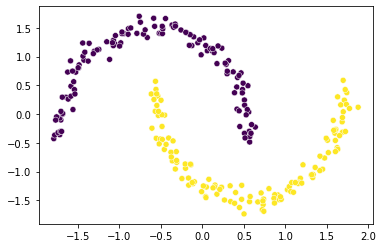

In [71]:
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

In [72]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

In [73]:
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [74]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [75]:
kmeans_silhouette

0.5

In [76]:
dbscan_silhouette

0.39

<AxesSubplot:title={'center':'dbscan labels'}>

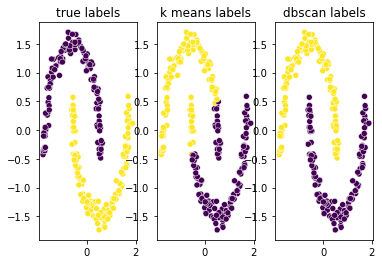

In [77]:
pylab.subplot(1, 3, 1)
pylab.title("true labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=true_labels)

pylab.subplot(1, 3, 2)
pylab.title("k means labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=kmeans.labels_)

pylab.subplot(1, 3, 3)
pylab.title("dbscan labels")
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], c=dbscan.labels_)

In [78]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

In [79]:
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [80]:
round(ari_kmeans, 2)

0.5

In [81]:
round(ari_dbscan, 2)

1.0